In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      csv_reader = csv.reader(training_file, delimiter=',')
      line_count = 0
      for row in csv_reader:
        if line_count!=0:
          label = np.asarray(row[0], dtype=int).reshape(-1,1)
          img = np.asarray(row[1:], dtype=float).reshape((1,28,28))

          if line_count==1:
            labels=label
            images=img
          else:
            labels = np.vstack([labels,label])
            images = np.vstack([images,img])

        line_count+=1
      # Your code ends here
    
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

In [ ]:
training_images_backup = training_images.copy()
testing_images_backup = testing_images.copy()

training_labels_backup = training_labels.copy()
testing_labels_backup = testing_labels.copy()

In [16]:
train_images = training_images_backup.copy()
testing_images = testing_images_backup.copy()

training_labels = training_labels_backup.copy()
testing_labels = testing_labels_backup.copy()

In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims, https://stackoverflow.com/questions/64165272/keras-custom-data-generator-from-numpy-array

training_images = np.expand_dims(training_images,-1)# Your Code Here
testing_images = np.expand_dims(testing_images,-1)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')
#    )

train_generator = train_datagen.flow(training_images,
                                     training_labels
                                     )
                  
validation_datagen = ImageDataGenerator(
  rescale=1./255)    
    # Your Code Here)

validation_generator = validation_datagen.flow(testing_images,
                                     testing_labels
                                     )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

In [8]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
# https://stackoverflow.com/questions/63171001/sparse-categorical-entropy-loss-becomes-nan-without-label-encoding will get nan loss
model = tf.keras.models.Sequential([
    # Your Code Here
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
    ])

print(model.summary())
# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Your Code Here)

# Train the Model
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1) # Your Code Here)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/25
429/429 [==============================] - 39s 19ms/step - loss: nan - accuracy: 0.9977 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/25
429/429 [==============================] - 8s 19ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/25
429/429 [==============================] - 8s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/25
429/429 [==============================] - 8s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/25
429/429 [==============================] - 8s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/25
429/429 [==============================] - 8s 19ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/25
429/429 [==============================] - 9s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/25
429/429 [====================

[6.92426086682151, 0.56609035]

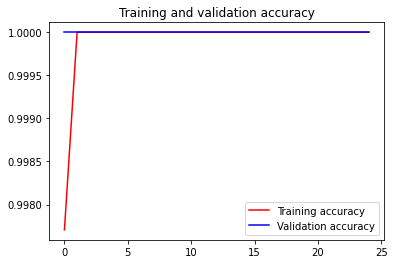

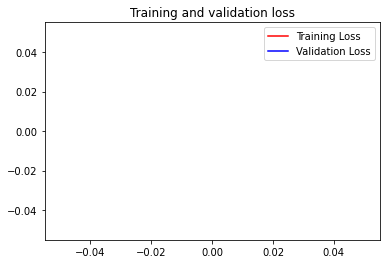

In [9]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()